In [1]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
indir = '/home/hsher/scratch/downsample_ciri/output'
circ_quant_output = [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]

In [2]:
def read_ciri_gtf(fname):
    bed = BedTool(fname)
    df = bed.to_dataframe()
    # filter for non-entries
    stat = df.loc[df['seqname'].str.contains('##'), 'seqname'].str.split(': ', expand = True)
    df = df.loc[~df['seqname'].str.contains('##')].reset_index()
    
    # get attributes
    attrs = pd.DataFrame([i.attrs for i in bed])
    
    return pd.concat([df, attrs], axis = 1), stat

In [3]:
circ_type_count = []
names = []
junc_ratio_tbl = []
bsj_ratio_tbl = []
fsj_ratio_tbl = []
stats = []
for fname in circ_quant_output:
    name = os.path.basename(fname).replace('.gtf', '')
    names.append(name)
    
    circ_df, stat = read_ciri_gtf(fname)
    
    circ_type_count.append(circ_df['circ_type'].value_counts())
    
    junc_ratio_tbl.append(circ_df.set_index('circ_id')['junc_ratio'].astype(float))
    bsj_ratio_tbl.append(circ_df.set_index('circ_id')['bsj'].astype(float))
    fsj_ratio_tbl.append(circ_df.set_index('circ_id')['fsj'].astype(float))
    stats.append(stat.set_index(0))

In [4]:
stats_df = pd.concat(stats, axis = 1).T
for col in ['##Total_Reads', '##Mapped_Reads', '##Circular_Reads']:
    stats_df[col] = stats_df[col].astype(int)

In [5]:
stats_df

,##Sample,##Total_Reads,##Mapped_Reads,##Circular_Reads,##version
1,HEK_rar.30000000,53364598,44398876,394044,1.1.2
1,circseq-bm-rar.50000000,100000000,91816738,291792,1.1.2
1,HEK_JC_rar.1000000,2000000,1728252,20662,1.1.2
1,HEK_rar11.30000000,60000000,49538438,1227748,1.1.2
1,HEK_JC_rar11.10000,20000,15850,324,1.1.2
...,...,...,...,...,...
1,circseq-bm-rar.40000000,80000000,73452542,232382,1.1.2
1,circseq-bm-rar11-nxt.70000000,140000000,122286450,1811722,1.1.2
1,HEK_JC_rar11.30000000,60000000,48327288,1032668,1.1.2
1,HEK_JC_rar.50000000,30050284,26049472,292030,1.1.2


In [6]:
stats_df['input_reads'] = stats_df['##Sample'].str.split('.', expand = True)[1].astype(int)
stats_df['lib'] = stats_df['##Sample'].str.split('.', expand = True)[0]

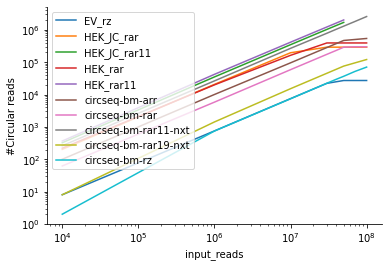

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots()
for name, group in stats_df.groupby(by = 'lib'):
    group.sort_values(by = 'input_reads').plot(x = 'input_reads', y = '##Circular_Reads', ax = ax, label = name)
sns.despine()
plt.legend()
plt.yscale('log')
plt.ylabel('#Circular reads')
plt.xscale('log')

In [8]:
counts = pd.concat(circ_type_count, axis = 1)
counts.columns = names
counts = counts.T

In [9]:
counts['input_reads'] = pd.Series(counts.index).str.split('.', expand = True)[1].astype(int).tolist()
counts['lib'] = pd.Series(counts.index).str.split('.', expand = True)[0].tolist()

In [10]:
counts.fillna(0, inplace = True)

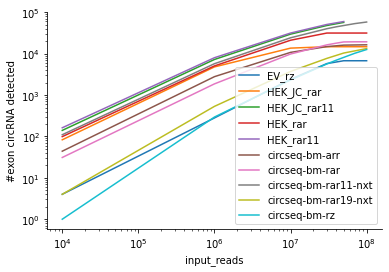

In [11]:
f, ax = plt.subplots()
for name, group in counts.groupby(by = 'lib'):
    group.sort_values(by = 'input_reads').plot(x = 'input_reads', y = 'exon', ax = ax, label = name)
sns.despine()
plt.legend()
plt.yscale('log')
plt.ylabel('#exon circRNA detected')
plt.xscale('log')

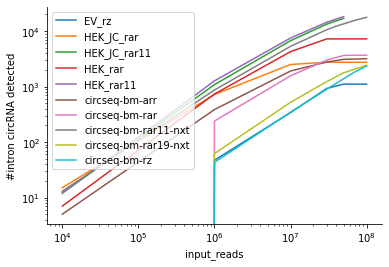

In [12]:
f, ax = plt.subplots()
for name, group in counts.groupby(by = 'lib'):
    group.sort_values(by = 'input_reads').plot(x = 'input_reads', y = 'intron', ax = ax, label = name)
sns.despine()
plt.legend()
plt.yscale('log')
plt.ylabel('#intron circRNA detected')
plt.xscale('log')

Text(0, 0.5, '#intron circRNA detected')

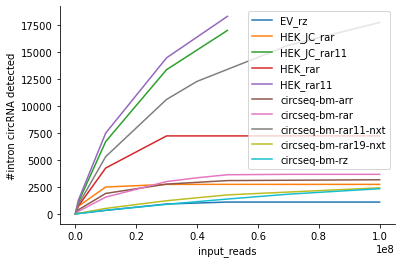

In [13]:
f, ax = plt.subplots()
for name, group in counts.groupby(by = 'lib'):
    group.sort_values(by = 'input_reads').plot(x = 'input_reads', y = 'intron', ax = ax, label = name)
sns.despine()
plt.legend()
plt.ylabel('#intron circRNA detected')

Text(0, 0.5, '#exon circRNA detected')

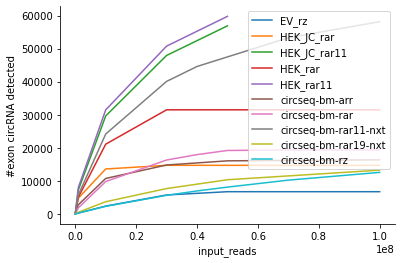

In [14]:
f, ax = plt.subplots()
for name, group in counts.groupby(by = 'lib'):
    group.sort_values(by = 'input_reads').plot(x = 'input_reads', y = 'exon', ax = ax, label = name)
sns.despine()
plt.legend()
plt.ylabel('#exon circRNA detected')